<a href="https://colab.research.google.com/github/vardanyan1/Stock/blob/master/Stock_1_start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
!pip install https://github.com/matplotlib/mpl_finance/archive/master.zip


     \ 634kB 171.6MB/s
  Stored in directory: /tmp/pip-ephem-wheel-cache-bbfqt4mg/wheels/8f/bf/8a/6c858b2a3be945c7b2d658fbf6ab797b451d686cbee8aa2679
Successfully built mpl-finance


In [0]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
from google.colab import files
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

In [0]:
start = dt.datetime(2015, 1, 1)
end = dt.datetime.now()


df = web.get_data_yahoo('TSLA', start, end)

In [0]:
df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)

In [0]:

#df.to_csv('tsla.csv')
# files.download('tsla.csv')

In [0]:
# df['Adj Close'].plot()


In [0]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=5, colspan=1, sharex=ax1)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])

ax2.bar(df.index, df['Volume'])

In [0]:
df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()
df.dropna(inplace=True)
df.head()

In [0]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()   # Open High Low Close
df_volume = df['Volume'].resample('10D').sum()

In [0]:
df_ohlc.reset_index(inplace=True)

In [0]:
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)


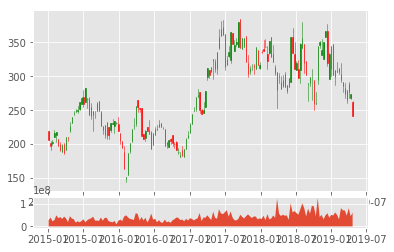

In [106]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=5, colspan=1, sharex=ax1)

ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')

ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)